<a href="https://colab.research.google.com/github/KumuthuA/ml-project/blob/main/layer_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from google.colab import drive

In [ ]:
global labels
global features
labels = [f"label_{i+1}" for i in range(4)]
features = [f'feature_{i+1}' for i in range(768)]
label_1 = labels[0]
label_2 = labels[1]
label_3 = labels[2]
label_4 = labels[3]

In [ ]:
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML/ML project/Layer 7"
train = pd.read_csv(f"{WORKING_DIR}/layer_7_train.csv")
valid = pd.read_csv(f"{WORKING_DIR}/layer_7_valid.csv")
test = pd.read_csv(f"{WORKING_DIR}/layer_7_test.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Defining functions

In [ ]:
def data_preprocess(train_df, valid_df, test_df, label):
    scaler = StandardScaler()

    # Apply feature scaling to training data
    X_train = pd.DataFrame(scaler.fit_transform(train_df.drop(labels, axis=1)), columns=features)
    y_train = train_df[label]

    # Apply feature scaling to validation data
    X_valid = pd.DataFrame(scaler.transform(valid_df.drop(labels, axis=1)), columns=features)
    y_valid = valid_df[label]

    # Apply feature scaling to test data
    X_test = pd.DataFrame(scaler.transform(test_df.drop(labels, axis=1)), columns=features)
    y_test = test_df[label]
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [ ]:
def feature_engineering_with_pca(X_train, X_valid, X_test, n_components):

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components)

    # Create a new DataFrame with the PCA-transformed features
    X_train_pca = pca.fit_transform(X_train)
    X_train_df_pca = pd.DataFrame(X_train_pca)
    X_valid_df_pca = pd.DataFrame(pca.transform(X_valid))
    X_test_df_pca = pd.DataFrame(pca.transform(X_test))
    print("Shape for label1 train set:", X_train_df_pca.shape)
    print("Shape for label1 validation set:", X_valid_df_pca.shape)
    print("Shape for label1 validation set:", X_test_df_pca.shape)

    return X_train_df_pca, X_valid_df_pca, X_test_df_pca

In [ ]:
def evaluate(y_valid, y_pred):
    print(f"Accuracy: {accuracy_score(y_valid, y_pred)}")
    print(f"F1 Score: {f1_score(y_valid, y_pred, average='weighted')}")
    print(f"Precision: {precision_score(y_valid, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_valid, y_pred, average='weighted')}")

# Data preprocessing - Label 01

In [ ]:
X_train_1, y_train_1, X_valid_1, y_valid_1, X_test_1, y_test_1 = data_preprocess(train, valid, test, label_1)

y_train_1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 28520 entries, 0 to 28519
Series name: label_1
Non-Null Count  Dtype
--------------  -----
28520 non-null  int64
dtypes: int64(1)
memory usage: 222.9 KB


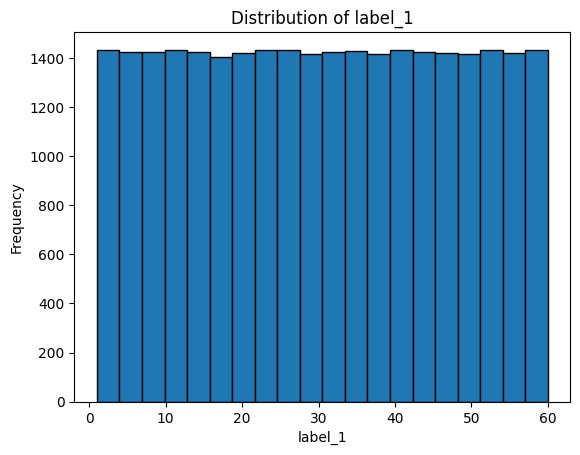

In [ ]:
plt.hist(y_train_1, bins=20, edgecolor='k')
plt.xlabel(label_1)
plt.ylabel('Frequency')
plt.title(f'Distribution of {label_1}')
plt.show()

# Cross Validation

In [ ]:
svc_model = SVC()
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

svc_scores = cross_val_score(svc_model, X_train_1, y_train_1, cv=kfold)
print("SVC Cross-Validation Scores:")
for i, score in enumerate(svc_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
svc_mean_accuracy = svc_scores.mean()
print(f"Mean Accuracy (SVC): {svc_mean_accuracy:.2f}")

knn_scores = cross_val_score(knn_model, X_train_1, y_train_1, cv=kfold)
print("\nKNN Cross-Validation Scores:")
for i, score in enumerate(knn_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
knn_mean_accuracy = knn_scores.mean()
print(f"Mean Accuracy (KNN): {knn_mean_accuracy:.2f}")

rf_scores = cross_val_score(rf_model, X_train_1, y_train_1, cv=kfold)
print("Random Forest Cross-Validation Scores:")
for i, score in enumerate(rf_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
rf_mean_accuracy = rf_scores.mean()
print(f"Mean Accuracy (Random Forest): {rf_mean_accuracy:.2f}")

# Feature reduction using PCA

In [ ]:
X_train_1_pca, X_valid_1_pca, X_test_1_pca = feature_engineering_with_pca(X_train_1, X_valid_1, X_test_1, n_components=0.95)

Shape for label1 train set: (28520, 321)
Shape for label1 validation set: (750, 321)
Shape for label1 validation set: (750, 321)


In [ ]:
model_1_knn = build_knn_model(X_train_1_pca, y_train_1, 5)

y_pred_1_knn = model_1_knn.predict(X_valid_1_pca)

print(confusion_matrix(y_valid_1, y_pred_1_knn))
evaluate(y_valid_1, y_pred_1_knn)

[[11  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  1  0  7]]
Accuracy: 0.868
F1 Score: 0.8689961468380442
Precision: 0.8821313971019233
Recall: 0.868


In [ ]:
model_1_pca_svc = build_svc_model(X_train_1_pca, y_train_1)

y_pred_1_svc = model_1_pca_svc.predict(X_valid_1_pca)

print(confusion_matrix(y_valid_1, y_pred_1_svc))
evaluate(y_valid_1, y_pred_1_svc)

[[12  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]
Accuracy: 0.9533333333333334
F1 Score: 0.9534530961430074
Precision: 0.9567244669274081
Recall: 0.9533333333333334


# Hyperparameter Tuning for label 1

In [ ]:
param_grid_1 = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

model_1_svc = SVC()

grid_search_1 = GridSearchCV(estimator=model_1_svc, param_grid=param_grid_1, cv=5, verbose=3, n_jobs=-1, scoring='accuracy')

grid_search_1.fit(X_train_1_pca, y_train_1)

best_params_1 = grid_search_1.best_params_
best_model_1 = grid_search_1.best_estimator_

valid_accuracy_1 = best_model_1.score(X_valid_1_pca, y_valid_1)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params_1)
print("Test Accuracy:", valid_accuracy_1)
#Best Hyperparameters: {'C': 100, 'kernel': 'rbf'}
#Test Accuracy: 0.9813333333333333

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 100, 'kernel': 'rbf'}
Test Accuracy: 0.9813333333333333
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.939 total time= 1.3min
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.935 total time= 1.2min
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.785 total time= 4.9min
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.650 total time= 4.2min
[CV 2/5] END ................C=1, kernel=linear;, score=0.935 total time= 1.2min
[CV 4/5] END ................C=1, kernel=linear;, score=0.937 total time= 1.3min
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.943 total time= 3.3min
[CV 5/5] END ...................C=1, kernel=rbf;, score=0.946 total time= 3.3min
[CV 4/5] END ..................C=1, kernel=poly;, score=0.895 total time= 3.0min
[CV 5/5] END ...............C=10, kernel=linear;, score=0.933 total time= 1.2min
[CV 4/5] END ..................C=10, kernel=r

# Predicting label 1

In [ ]:
model_1_pca_svc_2 = SVC(kernel='rbf', C=100)
model_1_pca_svc_2.fit(X_train_1_pca, y_train_1)
y_pred_1_svc_2 = model_1_pca_svc_2.predict(X_valid_1_pca)

print(confusion_matrix(y_valid_1, y_pred_1_svc_2))
evaluate(y_valid_1, y_pred_1_svc_2)

[[13  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]
Accuracy: 0.9813333333333333
F1 Score: 0.9816678421958451
Precision: 0.9835867521367521
Recall: 0.9813333333333333


In [ ]:
output_df_1_valid = pd.DataFrame({'ID': range(1, len(y_pred_1_svc_2) + 1), 'label_1': y_pred_1_svc_2})

output_file_path_1 = f"{WORKING_DIR}/label_7_1_valid.csv"
output_df_1_valid.to_csv(output_file_path_1, index=False)

In [ ]:
y_pred_1 = model_1_pca_svc_2.predict(X_train_1_pca)
output_df_1 = pd.DataFrame({'ID': range(1, len(y_pred_1) + 1), 'label_1': y_pred_1})

output_df_1.to_csv(f"{WORKING_DIR}/label_7_1_train.csv", index=False)
print(f'Predictions saved to label_7_1_train.csv')

Predictions saved to label_7_1_train.csv


In [ ]:
y_pred_1 = model_1_pca_svc_2.predict(X_test_1_pca)
output_df_1 = pd.DataFrame({'ID': range(1, len(y_pred_1) + 1), 'label_1': y_pred_1})

output_df_1.to_csv(f"{WORKING_DIR}/label_7_1_out_svc_final_best.csv", index=False)
print(f'Predictions saved to label_7_1_out_svc_final_best.csv')

Predictions saved to label_7_1_out_svc_final_best.csv
